In [1]:
# Problem 1
library(caretEnsemble)
library(RColorBrewer)
library(tm)
library(datarium)
library(leaps)
library(glmnet)
library(pls)
library(gam)
library(splines)
library(MVA)
library(nortest)
library(mvnormtest)
library(pastecs)
library(mvtnorm)
library(igraph)
library(dplyr)
library(ggplot2)
library(ggraph)
library(caret)
library(car)
library(mlbench)
library(tidyverse)
library(MASS)
library(ISLR)
library(psych)
library(faraway)
library(pls)
library(Matrix)
library(stats)
library(biotools)
library(faraway)

Loading required package: NLP

Loading required package: Matrix

Loaded glmnet 4.1-2


Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings


Loading required package: splines

Loading required package: foreach

Loaded gam 1.20


Loading required package: HSAUR2

Loading required package: tools


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:igraph’:

    as_data_frame, groups, union


The following objects are masked from ‘package:pastecs’:

    first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘ggplot2’


The following object is masked from ‘package:NLP’:

    annotate


The following ob

In [2]:
attach(swiss)
head(swiss)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6


In [3]:
model_01 <- lm(Fertility~., data=swiss)
model_01
summary(model_01)


Call:
lm(formula = Fertility ~ ., data = swiss)

Coefficients:
     (Intercept)       Agriculture       Examination         Education  
         66.9152           -0.1721           -0.2580           -0.8709  
        Catholic  Infant.Mortality  
          0.1041            1.0770  



Call:
lm(formula = Fertility ~ ., data = swiss)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2743  -5.2617   0.5032   4.1198  15.3213 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      66.91518   10.70604   6.250 1.91e-07 ***
Agriculture      -0.17211    0.07030  -2.448  0.01873 *  
Examination      -0.25801    0.25388  -1.016  0.31546    
Education        -0.87094    0.18303  -4.758 2.43e-05 ***
Catholic          0.10412    0.03526   2.953  0.00519 ** 
Infant.Mortality  1.07705    0.38172   2.822  0.00734 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.165 on 41 degrees of freedom
Multiple R-squared:  0.7067,	Adjusted R-squared:  0.671 
F-statistic: 19.76 on 5 and 41 DF,  p-value: 5.594e-10


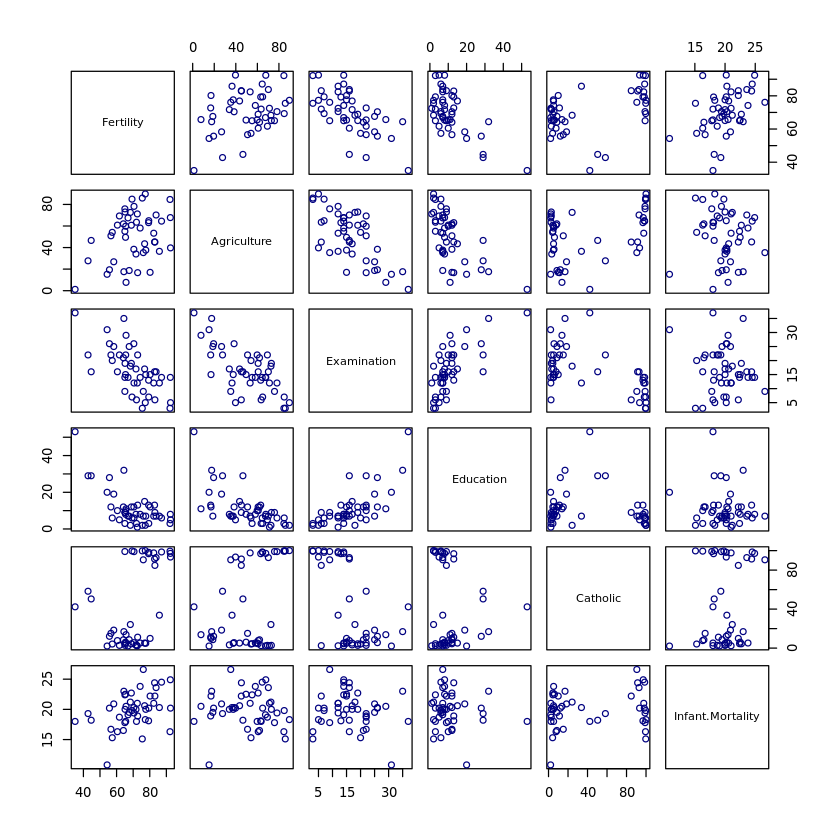

In [4]:
pairs(swiss, col='navy')



In [5]:
options(digits=3)

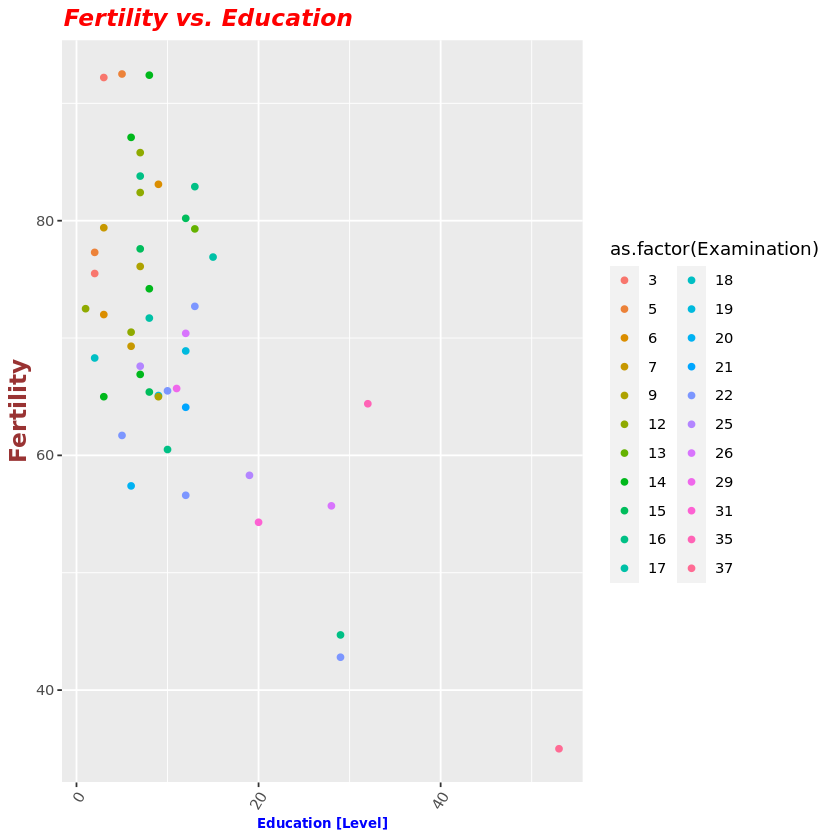

In [6]:
ggplot(swiss, aes(x=Education, y=Fertility, col= as.factor(Examination))) +geom_point()+ggtitle("Fertility vs. Education") +
  xlab("Education [Level]") + ylab("Fertility")+
  theme(
    plot.title = element_text(color="red", size=14, face="bold.italic"),
    axis.title.x = element_text(color="blue", size=8, face="bold"),
    axis.title.y = element_text(color="#993333", size=14, face="bold")
  )+ theme(axis.text.x = element_text(angle = 60, hjust = 1))


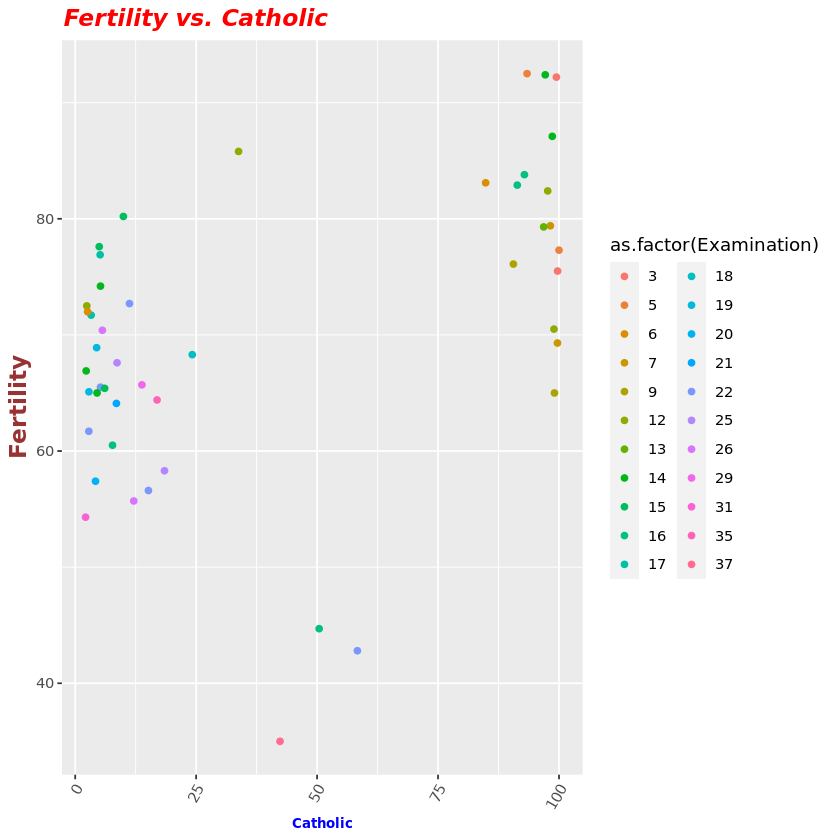

In [7]:
ggplot(swiss, aes(x=Catholic, y=Fertility, col= as.factor(Examination))) +geom_point()+ggtitle("Fertility vs. Catholic") +
  xlab("Catholic") + ylab("Fertility")+
  theme(
    plot.title = element_text(color="red", size=14, face="bold.italic"),
    axis.title.x = element_text(color="blue", size=8, face="bold"),
    axis.title.y = element_text(color="#993333", size=14, face="bold")
  )+ theme(axis.text.x = element_text(angle = 60, hjust = 1))


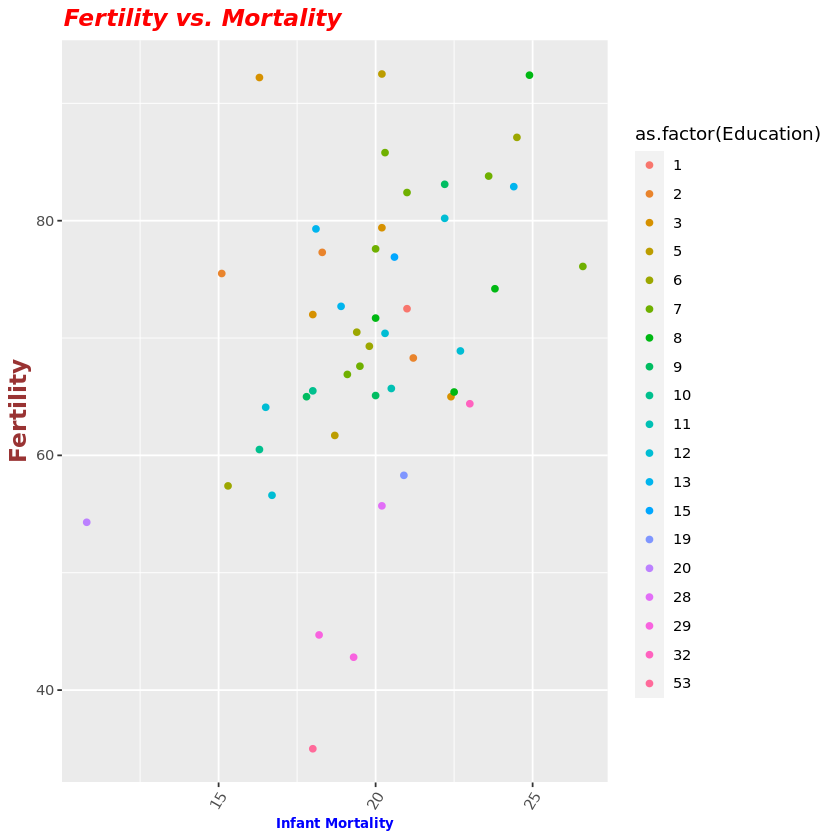

In [8]:
ggplot(swiss, aes(x=Infant.Mortality, y=Fertility, col= as.factor(Education))) +geom_point()+ggtitle("Fertility vs. Mortality") +
  xlab("Infant Mortality") + ylab("Fertility")+
  theme(
    plot.title = element_text(color="red", size=14, face="bold.italic"),
    axis.title.x = element_text(color="blue", size=8, face="bold"),
    axis.title.y = element_text(color="#993333", size=14, face="bold")
  )+ theme(axis.text.x = element_text(angle = 60, hjust = 1))

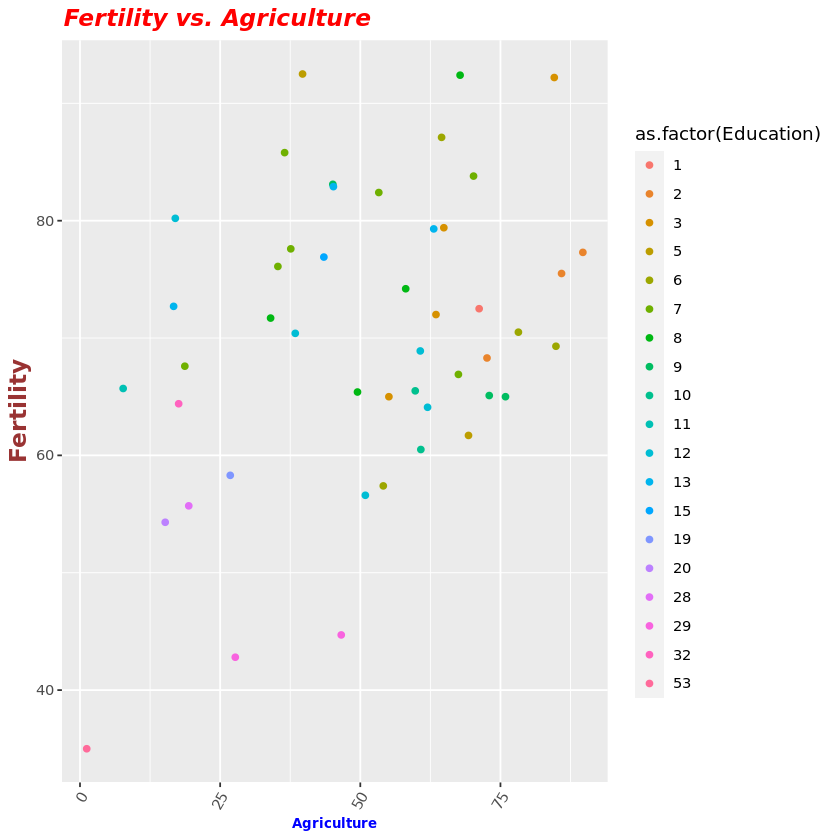

In [9]:
ggplot(swiss, aes(x=Agriculture, y=Fertility, col= as.factor(Education))) +geom_point()+ggtitle("Fertility vs. Agriculture") +
  xlab("Agriculture") + ylab("Fertility")+
  theme(
    plot.title = element_text(color="red", size=14, face="bold.italic"),
    axis.title.x = element_text(color="blue", size=8, face="bold"),
    axis.title.y = element_text(color="#993333", size=14, face="bold")
  )+ theme(axis.text.x = element_text(angle = 60, hjust = 1))

In [10]:
# Coefficians:
round(coef(summary(model_01)),5)


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),66.915,10.7060,6.25,0.00000
Agriculture,-0.172,0.0703,-2.45,0.01873
Examination,-0.258,0.2539,-1.02,0.31546
Education,-0.871,0.1830,-4.76,0.00002
Catholic,0.104,0.0353,2.95,0.00519
Infant.Mortality,1.077,0.3817,2.82,0.00734


In [11]:
# Confidence Intervals
confint(model_01)


,2.5 %,97.5 %
(Intercept),45.2939,88.5365
Agriculture,-0.3141,-0.0301
Examination,-0.7707,0.2547
Education,-1.2406,-0.5013
Catholic,0.0329,0.1753
Infant.Mortality,0.3061,1.8479


In [12]:
#Anova
anova(model_01)


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Agriculture,1,895,894.8,17.43,1.52e-04
Examination,1,2210,2210.4,43.05,6.88e-08
Education,1,892,891.8,17.37,1.55e-04
Catholic,1,667,667.1,12.99,8.39e-04
Infant.Mortality,1,409,408.8,7.96,7.34e-03
Residuals,41,2105,51.3,NA,NA


In [13]:
# Visualizing Predictions
model_pred <- predict(model_01)


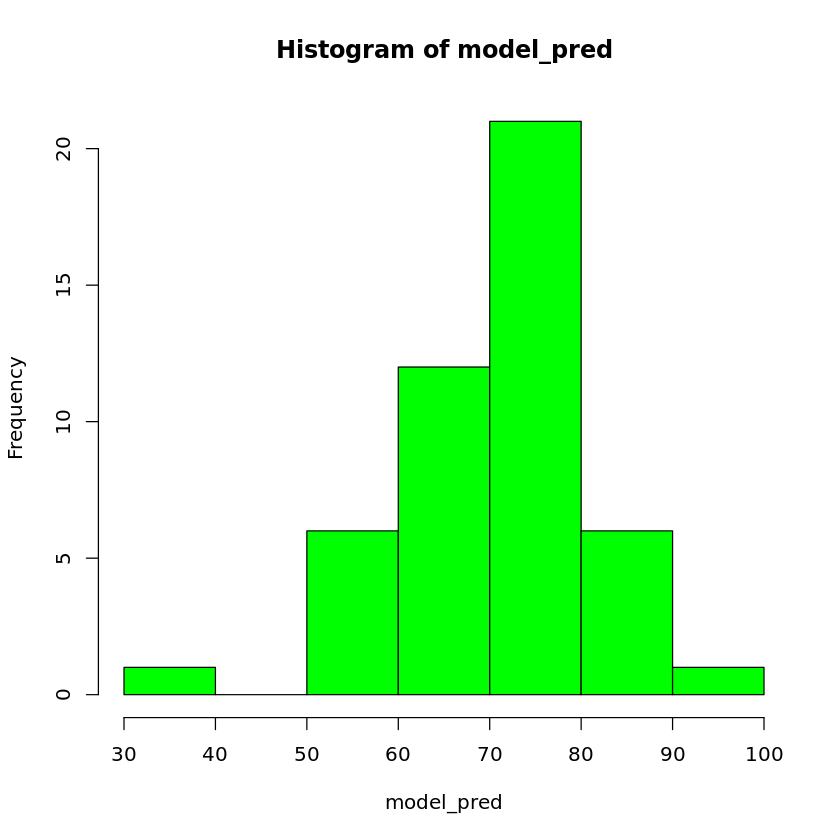

In [14]:
hist(model_pred, col='green')

In [15]:
# problem 2
attach(rock)

In [16]:
head(rock, 10)

,area,peri,shape,perm
,<int>,<dbl>,<dbl>,<dbl>
1,4990,2792,0.0903,6.3
2,7002,3893,0.1486,6.3
3,7558,3931,0.1833,6.3
4,7352,3869,0.1171,6.3
5,7943,3949,0.1224,17.1
6,7979,4010,0.1670,17.1
7,9333,4346,0.1897,17.1
8,8209,4345,0.1641,17.1
9,8393,3682,0.2037,119.0


In [17]:
model_02 <- lm(perm~., data=rock)
model_02
summary(model_02)


Call:
lm(formula = perm ~ ., data = rock)

Coefficients:
(Intercept)         area         peri        shape  
   485.6180       0.0913      -0.3440     899.0693  



Call:
lm(formula = perm ~ ., data = rock)

Residuals:
   Min     1Q Median     3Q    Max 
-750.3  -59.6   10.7  100.3  620.9 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 485.6180   158.4083    3.07  0.00371 ** 
area          0.0913     0.0250    3.65  0.00068 ***
peri         -0.3440     0.0511   -6.73  2.8e-08 ***
shape       899.0693   506.9510    1.77  0.08307 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 246 on 44 degrees of freedom
Multiple R-squared:  0.704,	Adjusted R-squared:  0.684 
F-statistic:   35 on 3 and 44 DF,  p-value: 1.03e-11


In [19]:
# Visualizing Predictions
model_pred2 <- predict(model_02)

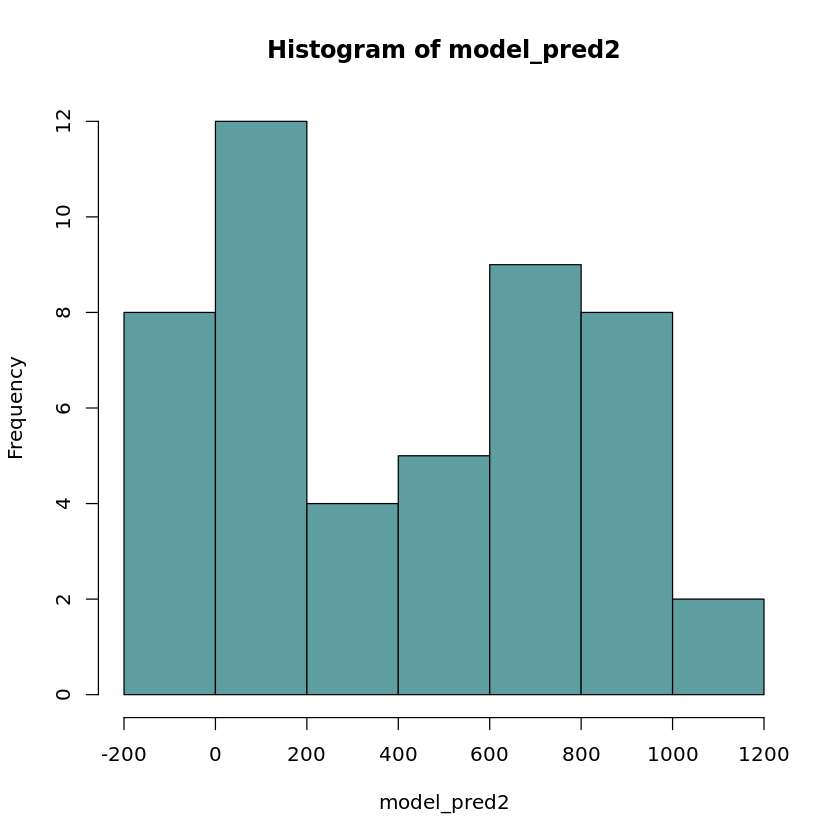

In [20]:
hist(model_pred2, col='cadetblue')

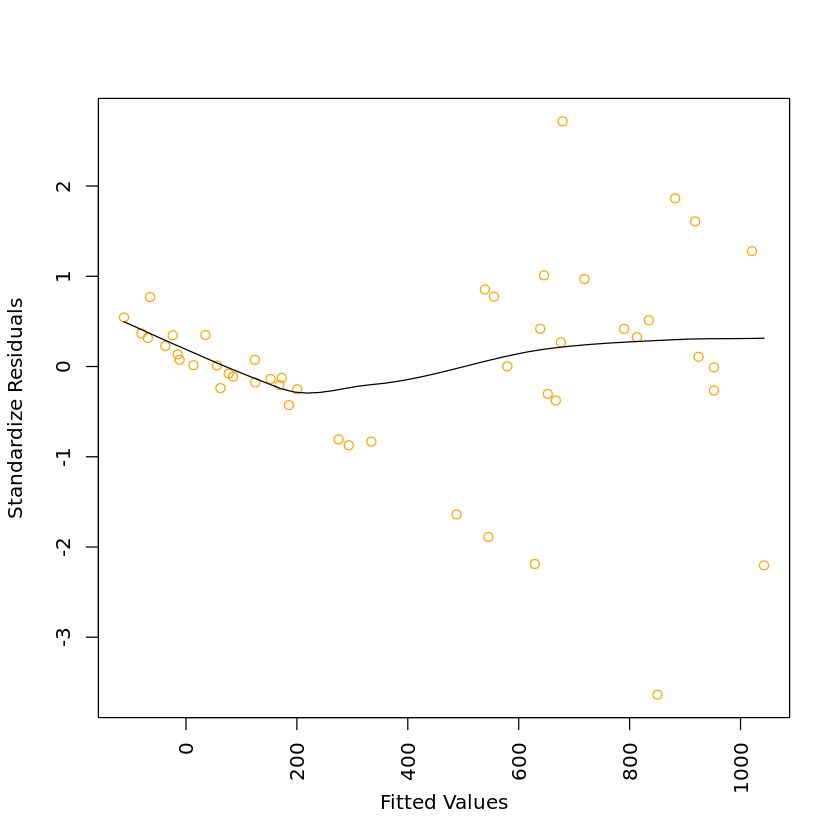

In [21]:
# Plot residuals against the fitted values
scatter.smooth(rstandard(model_02) ~ fitted(model_02), col="orange",
               las=3, ylab="Standardize Residuals", xlab="Fitted Values")


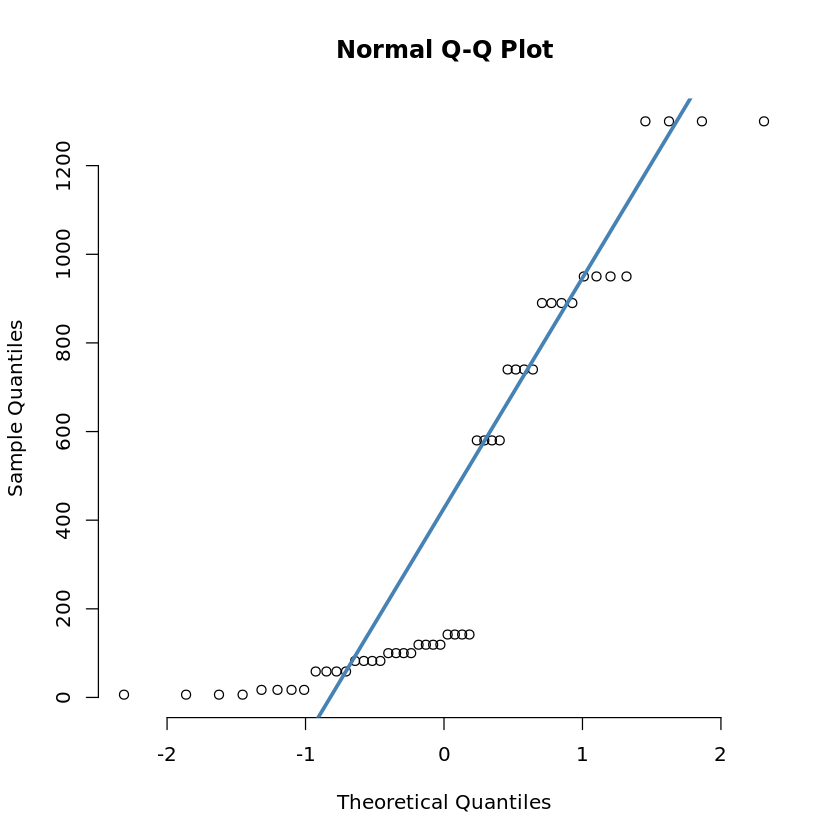

In [22]:
qqnorm(rock$perm, pch = 1, frame = FALSE)
qqline(rock$perm, col = "steelblue", lwd = 3)

[1] 41 42

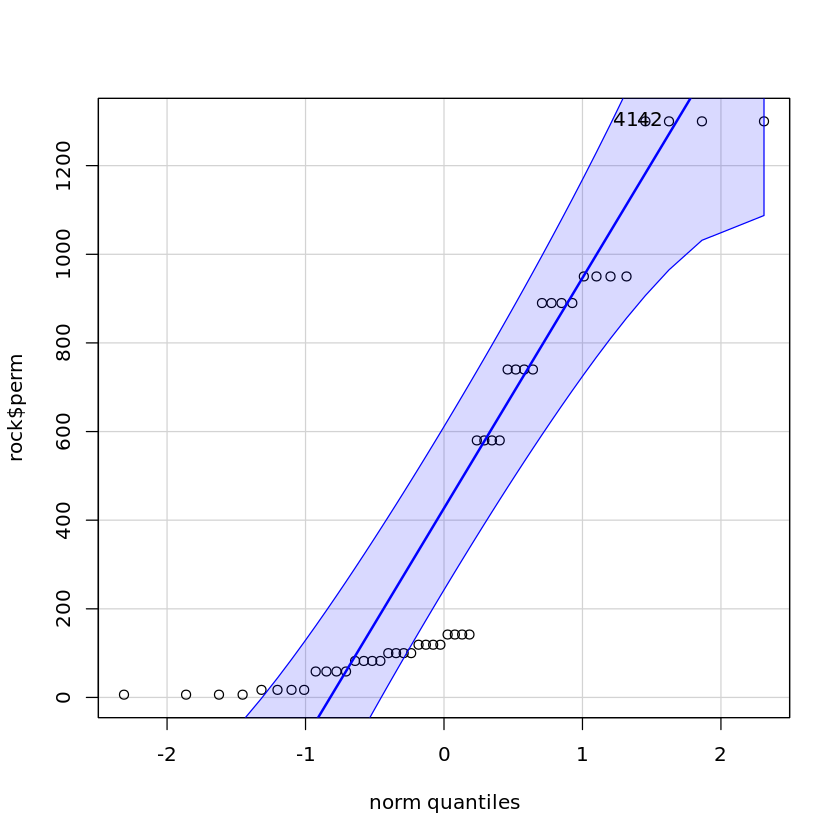

In [43]:
qqPlot(rock$perm)

In [44]:
# Shapiro-Wilk normality test
shapiro.test(rock$perm)


	Shapiro-Wilk normality test

data:  rock$perm
W = 0.8, p-value = 2e-06


In [23]:
# Problem 3
attach(prostate)
head(prostate, 10)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>
1,-0.580,2.77,50,-1.386,0,-1.39,6,0,-0.431
2,-0.994,3.32,58,-1.386,0,-1.39,6,0,-0.163
3,-0.511,2.69,74,-1.386,0,-1.39,7,20,-0.163
4,-1.204,3.28,58,-1.386,0,-1.39,6,0,-0.163
5,0.751,3.43,62,-1.386,0,-1.39,6,0,0.372
6,-1.050,3.23,50,-1.386,0,-1.39,6,0,0.765
7,0.737,3.47,64,0.615,0,-1.39,6,0,0.765
8,0.693,3.54,58,1.537,0,-1.39,6,0,0.854
9,-0.777,3.54,47,-1.386,0,-1.39,6,0,1.047


In [24]:
str(prostate)

'data.frame':	97 obs. of  9 variables:
 $ lcavol : num  -0.58 -0.994 -0.511 -1.204 0.751 ...
 $ lweight: num  2.77 3.32 2.69 3.28 3.43 ...
 $ age    : int  50 58 74 58 62 50 64 58 47 63 ...
 $ lbph   : num  -1.39 -1.39 -1.39 -1.39 -1.39 ...
 $ svi    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ lcp    : num  -1.39 -1.39 -1.39 -1.39 -1.39 ...
 $ gleason: int  6 6 7 6 6 6 6 6 6 6 ...
 $ pgg45  : int  0 0 20 0 0 0 0 0 0 0 ...
 $ lpsa   : num  -0.431 -0.163 -0.163 -0.163 0.372 ...


In [25]:
model_03 <- lm(lpsa~., data=prostate)
summary(model_03)
model_03


Call:
lm(formula = lpsa ~ ., data = prostate)

Residuals:
   Min     1Q Median     3Q    Max 
-1.733 -0.371 -0.017  0.414  1.638 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.66934    1.29639    0.52   0.6069    
lcavol       0.58702    0.08792    6.68  2.1e-09 ***
lweight      0.45447    0.17001    2.67   0.0090 ** 
age         -0.01964    0.01117   -1.76   0.0823 .  
lbph         0.10705    0.05845    1.83   0.0704 .  
svi          0.76616    0.24431    3.14   0.0023 ** 
lcp         -0.10547    0.09101   -1.16   0.2496    
gleason      0.04514    0.15746    0.29   0.7750    
pgg45        0.00453    0.00442    1.02   0.3089    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.708 on 88 degrees of freedom
Multiple R-squared:  0.655,	Adjusted R-squared:  0.623 
F-statistic: 20.9 on 8 and 88 DF,  p-value: <2e-16



Call:
lm(formula = lpsa ~ ., data = prostate)

Coefficients:
(Intercept)       lcavol      lweight          age         lbph          svi  
    0.66934      0.58702      0.45447     -0.01964      0.10705      0.76616  
        lcp      gleason        pgg45  
   -0.10547      0.04514      0.00453  


In [26]:
#install.packages("broom")

In [27]:
library(broom)

In [28]:
glance(model_03)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.655,0.623,0.708,20.9,2.24e-17,8,-99.5,219,245,44.2,88,97


In [29]:
#intercept-only model
intercept_only <- lm(lpsa ~ 1, data=prostate)

In [30]:
summary(intercept_only)


Call:
lm(formula = lpsa ~ 1, data = prostate)

Residuals:
   Min     1Q Median     3Q    Max 
-2.909 -0.747  0.113  0.578  3.104 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.478      0.117    21.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.15 on 96 degrees of freedom


In [31]:
summary(model_03)


Call:
lm(formula = lpsa ~ ., data = prostate)

Residuals:
   Min     1Q Median     3Q    Max 
-1.733 -0.371 -0.017  0.414  1.638 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.66934    1.29639    0.52   0.6069    
lcavol       0.58702    0.08792    6.68  2.1e-09 ***
lweight      0.45447    0.17001    2.67   0.0090 ** 
age         -0.01964    0.01117   -1.76   0.0823 .  
lbph         0.10705    0.05845    1.83   0.0704 .  
svi          0.76616    0.24431    3.14   0.0023 ** 
lcp         -0.10547    0.09101   -1.16   0.2496    
gleason      0.04514    0.15746    0.29   0.7750    
pgg45        0.00453    0.00442    1.02   0.3089    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.708 on 88 degrees of freedom
Multiple R-squared:  0.655,	Adjusted R-squared:  0.623 
F-statistic: 20.9 on 8 and 88 DF,  p-value: <2e-16


In [32]:
library(leaps)

In [33]:
tmp<-regsubsets(lpsa ~ lcavol + lweight + age + lbph + svi + lcp + gleason + pgg45, data=prostate, nbest=1000, really.big=T, intercept=F)

In [34]:
all_mods <- summary(tmp)[[1]]
all_mods <- lapply(1:nrow(all_mods), function(x) as.formula(paste("lpsa~", paste(names(which(all_mods[x,])), collapse="+"))))
head(all_mods)

[[1]]
lpsa ~ lweight
<environment: 0x55f4a3acf328>

[[2]]
lpsa ~ gleason
<environment: 0x55f4a3afc7d8>

[[3]]
lpsa ~ age
<environment: 0x55f4a3f17be8>

[[4]]
lpsa ~ lcavol
<environment: 0x55f4a3f1d2e0>

[[5]]
lpsa ~ pgg45
<environment: 0x55f4a3f1eba8>

[[6]]
lpsa ~ svi
<environment: 0x55f4a3f204a8>


In [35]:
all.lm<-lapply(all_mods, lm, prostate)
sapply(all.lm, extractAIC)[2,]

[1]  17.840  16.641  28.007 -44.366  11.783  -6.658  27.650  -3.926 -52.690
 [10] -43.053 -42.370 -17.884 -15.359 -10.423  -6.205  -3.347  -3.334  -0.287
 [19]  13.061  13.423   3.382  16.027  19.749  19.388  18.039 -43.453  28.342
 [28] -45.203 -47.898 -51.397  -9.591  -3.259  11.193 -12.291 -12.468  -6.725
 [37] -60.676 -54.327 -52.236 -51.935 -51.463 -52.131 -49.664 -46.359 -49.404
 [46] -41.063 -43.425 -41.714 -46.589 -43.284 -41.463 -23.841 -21.536 -17.841
 [55] -23.342 -15.929 -15.242 -15.050 -15.671 -13.895 -13.379 -12.244  -8.958
 [64]  -8.913 -11.520 -10.541  -8.122  -5.753  -2.220  -1.608  -4.933   1.383
 [73]  -2.121   1.711   0.387 -43.252  12.529  14.789 -49.657   5.145   5.381
 [82]  13.190  17.969  21.369 -47.235 -48.325 -50.180 -57.676 -11.353 -14.231
 [91]  -5.627 -17.646 -61.352 -59.847 -59.497 -58.806 -59.469 -54.183 -53.222
[100] -55.754 -52.354 -52.434 -51.551 -50.971 -51.572 -51.456 -51.083 -50.940
[109] -48.177 -56.735 -47.664 -48.199 -47.661 -45.330 -46.632 -45.307 -48.193
[118] -41.488 -39.714 -41.468 -47.678 -45.892 -41.316 -23.502 -23.234 -24.854
[127] -21.844 -20.727 -19.723 -21.730 -22.463 -21.646 -17.091 -15.871 -13.383
[136] -13.551 -13.290 -13.099 -13.854 -13.959 -13.751 -11.897 -10.888 -10.273
[145] -15.672  -7.347 -10.128 -12.257  -3.811 -49.188  -3.909  -0.371  -3.686
[154]   1.864   3.349   2.386 -46.503 -56.057  14.529   7.138 -56.021 -16.221
[163] -60.092 -61.374 -59.796 -59.565 -59.293 -58.797 -58.716 -57.885 -57.644
[172] -57.937 -54.009 -54.314 -52.184 -52.196 -51.388 -51.329 -51.282 -54.052
[181] -54.959 -50.458 -51.039 -50.178 -50.023 -55.189 -46.186 -47.200 -55.373
[190] -46.210 -47.257 -44.125 -44.798 -45.905 -39.516 -45.745 -24.032 -22.545
[199] -21.593 -21.310 -22.861 -23.044 -19.248 -20.776 -21.165 -20.115 -15.091
[208] -15.103 -12.120 -12.136 -11.519 -11.971 -11.624  -8.893 -14.221 -54.974
[217]  -1.947   3.843 -60.351 -60.789 -58.959 -58.560 -59.650 -58.102 -58.301
[226] -57.394 -57.464 -56.763 -52.018 -52.037 -53.745 -52.997 -50.196 -50.033
[235] -49.442 -53.382 -54.746 -45.266 -43.969 -22.558 -22.032 -20.872 -21.064
[244] -19.576 -13.103 -10.345 -59.174 -60.231 -58.853 -56.975 -56.693 -50.046
[253] -52.749 -20.567 -58.322

In [36]:
# Visualizing Predictions
model_pred_01 <- predict(model_03)

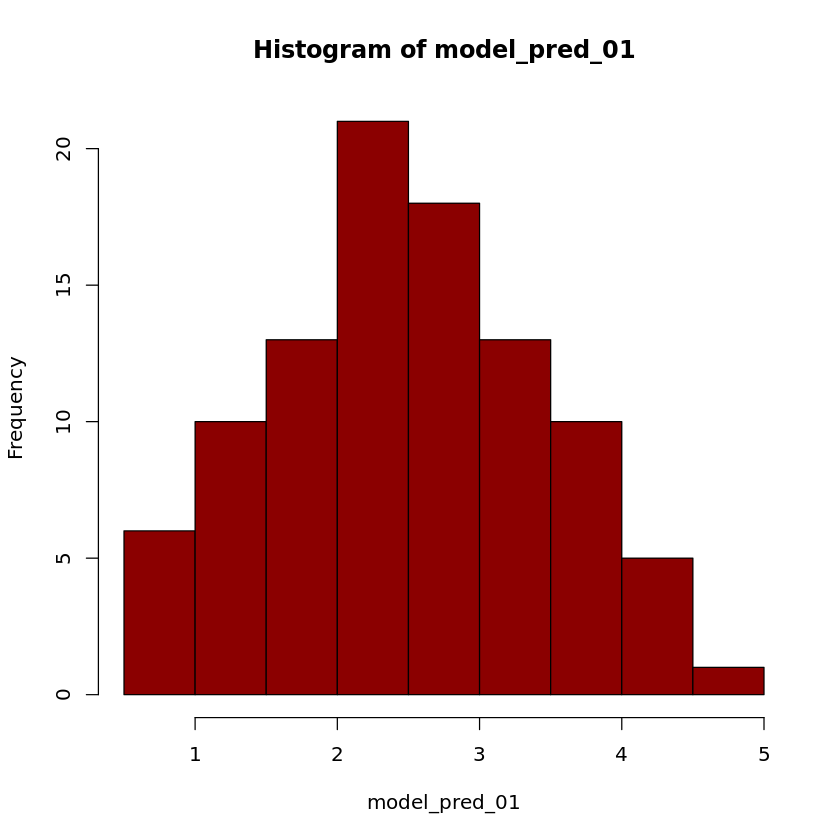

In [37]:
hist(model_pred_01, col='darkred')

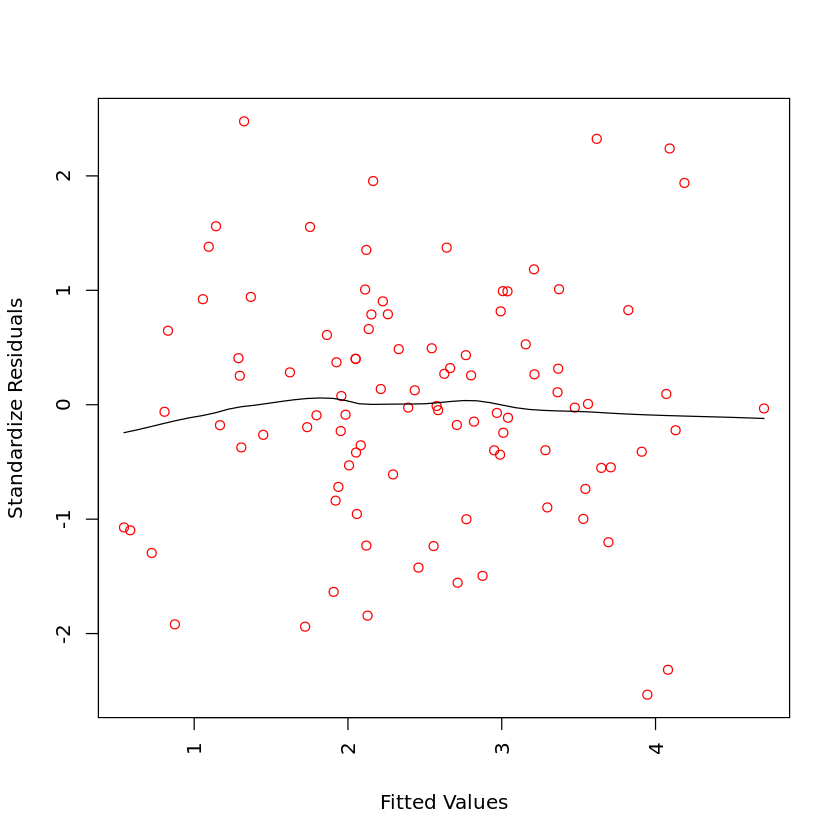

In [39]:
# Plot residuals against the fitted values
scatter.smooth(rstandard(model_03) ~ fitted(model_03), col="red",
               las=3, ylab="Standardize Residuals", xlab="Fitted Values")

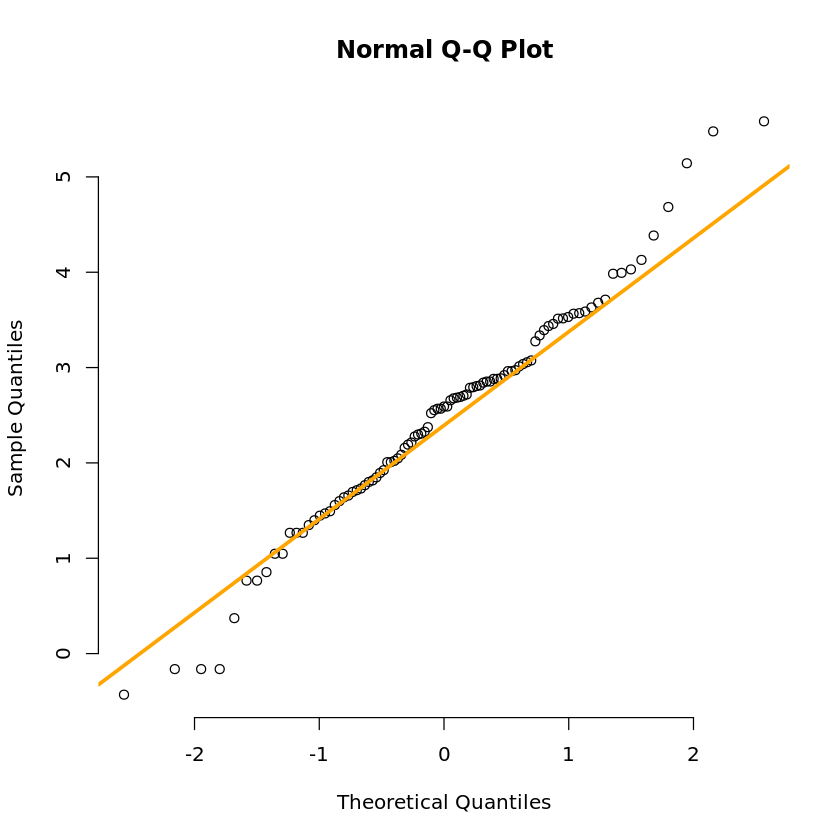

In [40]:
qqnorm(prostate$lpsa, pch = 1, frame = FALSE)
qqline(prostate$lpsa, col = "orange", lwd = 3)

[1] 97 96

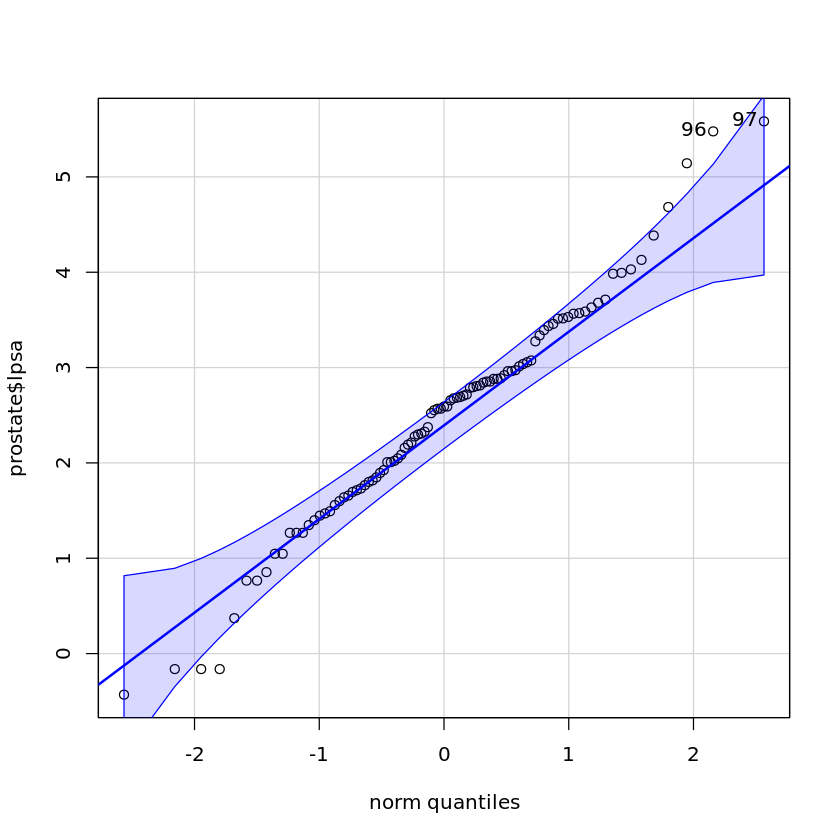

In [41]:
qqPlot(prostate$lpsa)

In [45]:
# Shapiro-Wilk normality test
shapiro.test(prostate$lpsa)


	Shapiro-Wilk normality test

data:  prostate$lpsa
W = 1, p-value = 0.3


In [47]:
#Problem #4
data01 <- read.csv('Utilityweather-2.csv')
head(data01, 10)

,Date,Value,AVG_TEMP,AVG_WIND,AVG_HUMID,CLOUD,PRESSURE,changeAVG_TEMP,changeAVG_WIND,changeAVG_HUMID,changeCLOUD,changePRESSURE,Month,Week,Weeday
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1-Jan-14,4730,25.7,3.5,68.7,47.5,1027,0.0,0.0,0.0,0.0,0.0,1,1,4
2,2-Jan-14,5603,24.5,7.7,81.9,87.1,1014,-1.2,4.2,13.2,39.6,-12.7,1,1,5
3,3-Jan-14,5898,10.9,11.3,63.1,37.3,1021,-13.6,3.6,-18.8,-49.8,7.1,1,1,6
4,4-Jan-14,5563,11.9,4.2,65.9,6.1,1030,1.0,-7.1,2.8,-31.2,8.4,1,1,7
5,5-Jan-14,5108,22.6,3.3,85.4,54.5,1021,10.7,-0.9,19.5,48.4,-9.0,1,2,1
6,6-Jan-14,5514,34.1,14.4,71.0,69.4,1004,11.5,11.1,-14.4,14.9,-17.1,1,2,2
7,7-Jan-14,6616,3.1,14.9,47.7,11.8,1024,-31.0,0.5,-23.3,-57.6,20.0,1,2,3
8,8-Jan-14,6326,12.4,5.3,55.4,38.3,1033,9.3,-9.6,7.7,26.5,9.3,1,2,4
9,9-Jan-14,5739,23.6,2.2,61.5,33.3,1036,11.2,-3.1,6.1,-5.0,2.9,1,2,5


In [48]:
str(data01)

'data.frame':	2102 obs. of  15 variables:
 $ Date           : chr  "1-Jan-14" "2-Jan-14" "3-Jan-14" "4-Jan-14" ...
 $ Value          : num  4730 5603 5898 5563 5108 ...
 $ AVG_TEMP       : num  25.7 24.5 10.9 11.9 22.6 34.1 3.1 12.4 23.6 30.3 ...
 $ AVG_WIND       : num  3.5 7.7 11.3 4.2 3.3 14.4 14.9 5.3 2.2 2.7 ...
 $ AVG_HUMID      : num  68.7 81.9 63.1 65.9 85.4 71 47.7 55.4 61.5 84.6 ...
 $ CLOUD          : num  47.5 87.1 37.3 6.1 54.5 69.4 11.8 38.3 33.3 89.7 ...
 $ PRESSURE       : num  1027 1014 1021 1030 1021 ...
 $ changeAVG_TEMP : num  0 -1.2 -13.6 1 10.7 11.5 -31 9.3 11.2 6.7 ...
 $ changeAVG_WIND : num  0 4.2 3.6 -7.1 -0.9 11.1 0.5 -9.6 -3.1 0.5 ...
 $ changeAVG_HUMID: num  0 13.2 -18.8 2.8 19.5 -14.4 -23.3 7.7 6.1 23.1 ...
 $ changeCLOUD    : num  0 39.6 -49.8 -31.2 48.4 14.9 -57.6 26.5 -5 56.4 ...
 $ changePRESSURE : num  0 -12.7 7.1 8.4 -9 -17.1 20 9.3 2.9 -6.3 ...
 $ Month          : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Week           : int  1 1 1 1 2 2 2 2 2 2 ...
 $ Weeda

In [66]:
data02 <- head(data01, 90)
head(data02)

,Date,Value,AVG_TEMP,AVG_WIND,AVG_HUMID,CLOUD,PRESSURE,changeAVG_TEMP,changeAVG_WIND,changeAVG_HUMID,changeCLOUD,changePRESSURE,Month,Week,Weeday
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1-Jan-14,4730,25.7,3.5,68.7,47.5,1027,0.0,0.0,0.0,0.0,0.0,1,1,4
2,2-Jan-14,5603,24.5,7.7,81.9,87.1,1014,-1.2,4.2,13.2,39.6,-12.7,1,1,5
3,3-Jan-14,5898,10.9,11.3,63.1,37.3,1021,-13.6,3.6,-18.8,-49.8,7.1,1,1,6
4,4-Jan-14,5563,11.9,4.2,65.9,6.1,1030,1.0,-7.1,2.8,-31.2,8.4,1,1,7
5,5-Jan-14,5108,22.6,3.3,85.4,54.5,1021,10.7,-0.9,19.5,48.4,-9.0,1,2,1
6,6-Jan-14,5514,34.1,14.4,71.0,69.4,1004,11.5,11.1,-14.4,14.9,-17.1,1,2,2


In [67]:
# Explore the dataset (Utilityweather.csv) - perform exploratory analysis
glimpse(data02)# Number of observations (rows), variables, and a head of the first cases.

Rows: 90
Columns: 15
$ Date            <chr> "1-Jan-14", "2-Jan-14", "3-Jan-14", "4-Jan-14", "5-Jan…
$ Value           <dbl> 4730, 5603, 5898, 5563, 5108, 5514, 6616, 6326, 5739, …
$ AVG_TEMP        <dbl> 25.7, 24.5, 10.9, 11.9, 22.6, 34.1, 3.1, 12.4, 23.6, 3…
$ AVG_WIND        <dbl> 3.5, 7.7, 11.3, 4.2, 3.3, 14.4, 14.9, 5.3, 2.2, 2.7, 6…
$ AVG_HUMID       <dbl> 68.7, 81.9, 63.1, 65.9, 85.4, 71.0, 47.7, 55.4, 61.5, …
$ CLOUD           <dbl> 47.5, 87.1, 37.3, 6.1, 54.5, 69.4, 11.8, 38.3, 33.3, 8…
$ PRESSURE        <dbl> 1027, 1014, 1021, 1030, 1021, 1004, 1024, 1033, 1036, …
$ changeAVG_TEMP  <dbl> 0.0, -1.2, -13.6, 1.0, 10.7, 11.5, -31.0, 9.3, 11.2, 6…
$ changeAVG_WIND  <dbl> 0.0, 4.2, 3.6, -7.1, -0.9, 11.1, 0.5, -9.6, -3.1, 0.5,…
$ changeAVG_HUMID <dbl> 0.0, 13.2, -18.8, 2.8, 19.5, -14.4, -23.3, 7.7, 6.1, 2…
$ changeCLOUD     <dbl> 0.0, 39.6, -49.8, -31.2, 48.4, 14.9, -57.6, 26.5, -5.0…
$ changePRESSURE  <dbl> 0.0, -12.7, 7.1, 8.4, -9.0, -17.1, 20.0, 9.3, 2.9, -6.…
$ Month           <

In [54]:
#install.packages("funModeling")

Installing package into ‘/home/mladenoffj/R_libs’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘checkmate’, ‘gtools’, ‘caTools’, ‘Formula’, ‘htmlTable’, ‘gplots’, ‘Hmisc’, ‘ROCR’, ‘pander’, ‘entropy’




In [55]:
library(tidyverse)
library(funModeling)

Loading required package: Hmisc

Loading required package: survival


Attaching package: ‘survival’


The following objects are masked from ‘package:faraway’:

    rats, solder


The following object is masked from ‘package:caret’:

    cluster


Loading required package: Formula


Attaching package: ‘Hmisc’


The following object is masked from ‘package:psych’:

    describe


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units


funModeling v.1.9.4 :)
Examples and tutorials at livebook.datascienceheroes.com
 / Now in Spanish: librovivodecienciadedatos.ai



In [68]:
# Check the metrics about data types, zeros, infinite numbers, and missing values
status(data02)

,variable,q_zeros,p_zeros,q_na,p_na,q_inf,p_inf,type,unique
,<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<chr>,<int>
Date,Date,0,0.0000,0,0,0,0,character,90
Value,Value,0,0.0000,0,0,0,0,numeric,90
AVG_TEMP,AVG_TEMP,0,0.0000,0,0,0,0,numeric,85
AVG_WIND,AVG_WIND,0,0.0000,0,0,0,0,numeric,60
AVG_HUMID,AVG_HUMID,0,0.0000,0,0,0,0,numeric,75
CLOUD,CLOUD,0,0.0000,0,0,0,0,numeric,83
PRESSURE,PRESSURE,0,0.0000,0,0,0,0,numeric,78
changeAVG_TEMP,changeAVG_TEMP,1,0.0111,0,0,0,0,numeric,81
changeAVG_WIND,changeAVG_WIND,2,0.0222,0,0,0,0,numeric,63


In [69]:
# Profiling the Data Input
data01_status=df_status(data02, print_results = F)
data01_status

variable,q_zeros,p_zeros,q_na,p_na,q_inf,p_inf,type,unique
<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<chr>,<int>
Date,0,0.00,0,0,0,0,character,90
Value,0,0.00,0,0,0,0,numeric,90
AVG_TEMP,0,0.00,0,0,0,0,numeric,85
AVG_WIND,0,0.00,0,0,0,0,numeric,60
AVG_HUMID,0,0.00,0,0,0,0,numeric,75
CLOUD,0,0.00,0,0,0,0,numeric,83
PRESSURE,0,0.00,0,0,0,0,numeric,78
changeAVG_TEMP,1,1.11,0,0,0,0,numeric,81
changeAVG_WIND,2,2.22,0,0,0,0,numeric,63


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


   changeAVG_TEMP frequency percentage cumulative_perc
1            -5.2         2       2.22            2.22
2            -4.5         2       2.22            4.44
3            -1.2         2       2.22            6.66
4            -0.5         2       2.22            8.88
5            -0.2         2       2.22           11.10
6               1         2       2.22           13.32
7               2         2       2.22           15.54
8             7.8         2       2.22           17.76
9            14.8         2       2.22           19.98
10            -31         1       1.11           21.09
11          -21.5         1       1.11           22.20
12          -15.8         1       1.11           23.31
13          -15.6         1       1.11           24.42
14          -14.3         1       1.11           25.53
15          -14.2         1       1.11           26.64
16          -13.6         1       1.11           27.75
17            -12         1       1.11           28.86
18        

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


   changeAVG_WIND frequency percentage cumulative_perc
1             0.1         4       4.44            4.44
2            -0.9         3       3.33            7.77
3            -7.1         2       2.22            9.99
4            -3.5         2       2.22           12.21
5            -3.1         2       2.22           14.43
6              -3         2       2.22           16.65
7            -2.2         2       2.22           18.87
8            -1.1         2       2.22           21.09
9              -1         2       2.22           23.31
10           -0.7         2       2.22           25.53
11           -0.6         2       2.22           27.75
12           -0.5         2       2.22           29.97
13              0         2       2.22           32.19
14            0.2         2       2.22           34.41
15            0.4         2       2.22           36.63
16            0.5         2       2.22           38.85
17            0.7         2       2.22           41.07
18        

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


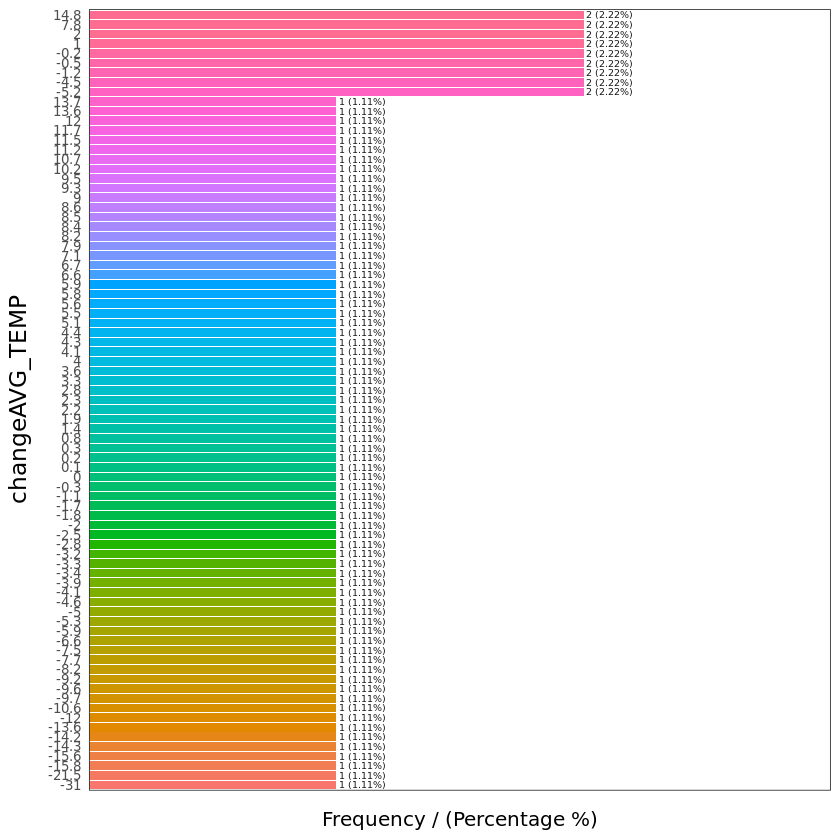

   changeAVG_HUMID frequency percentage cumulative_perc
1             -1.3         3       3.33            3.33
2                0         3       3.33            6.66
3              6.1         3       3.33            9.99
4            -18.8         2       2.22           12.21
5            -15.6         2       2.22           14.43
6             -4.9         2       2.22           16.65
7              2.8         2       2.22           18.87
8              5.3         2       2.22           21.09
9            -34.8         1       1.11           22.20
10             -31         1       1.11           23.31
11           -26.4         1       1.11           24.42
12           -26.2         1       1.11           25.53
13           -23.3         1       1.11           26.64
14           -22.6         1       1.11           27.75
15           -20.7         1       1.11           28.86
16           -19.1         1       1.11           29.97
17           -17.2         1       1.11         

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


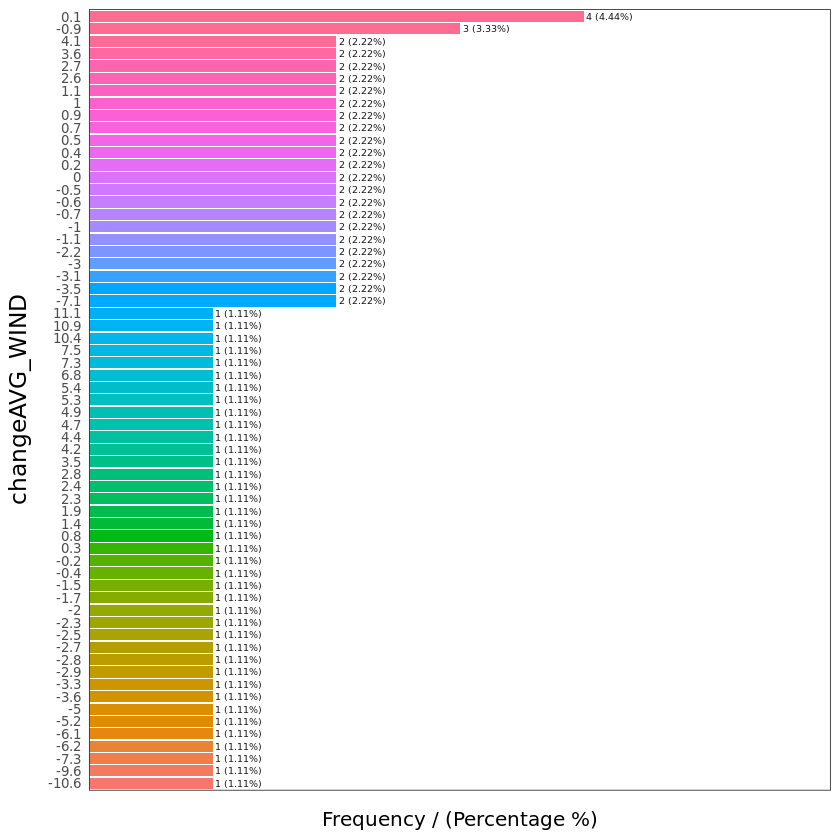

   changeCLOUD frequency percentage cumulative_perc
1           -7         2       2.22            2.22
2         -5.7         2       2.22            4.44
3         -4.6         2       2.22            6.66
4        -70.6         1       1.11            7.77
5        -65.4         1       1.11            8.88
6          -61         1       1.11            9.99
7        -57.6         1       1.11           11.10
8        -56.2         1       1.11           12.21
9          -56         1       1.11           13.32
10       -53.6         1       1.11           14.43
11         -52         1       1.11           15.54
12       -50.8         1       1.11           16.65
13       -49.8         1       1.11           17.76
14       -48.9         1       1.11           18.87
15         -40         1       1.11           19.98
16       -37.9         1       1.11           21.09
17         -36         1       1.11           22.20
18       -32.6         1       1.11           23.31
19       -32

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


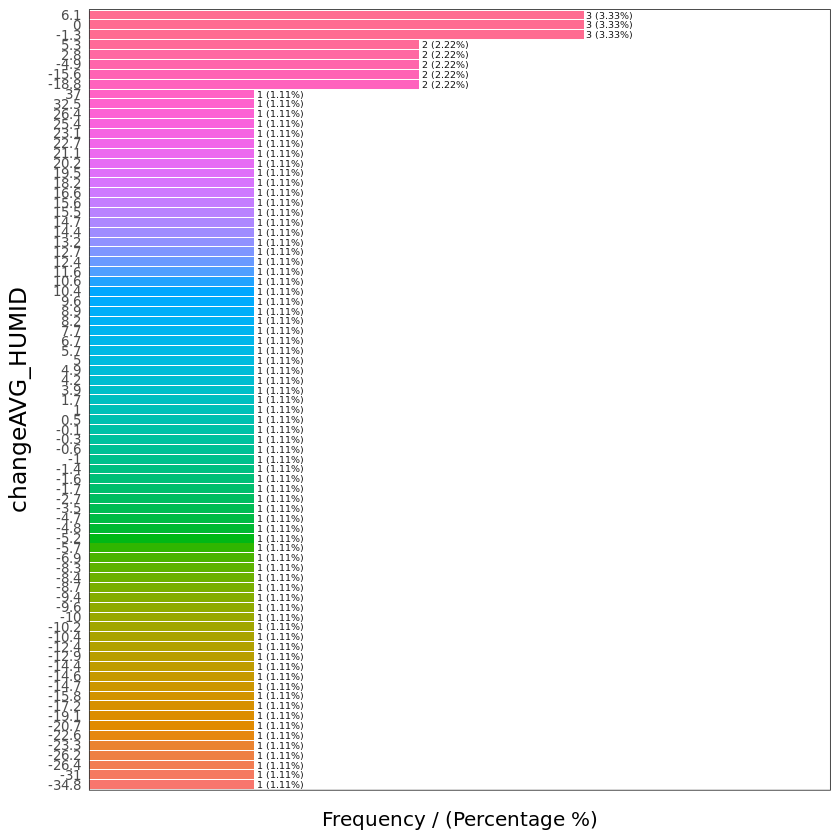

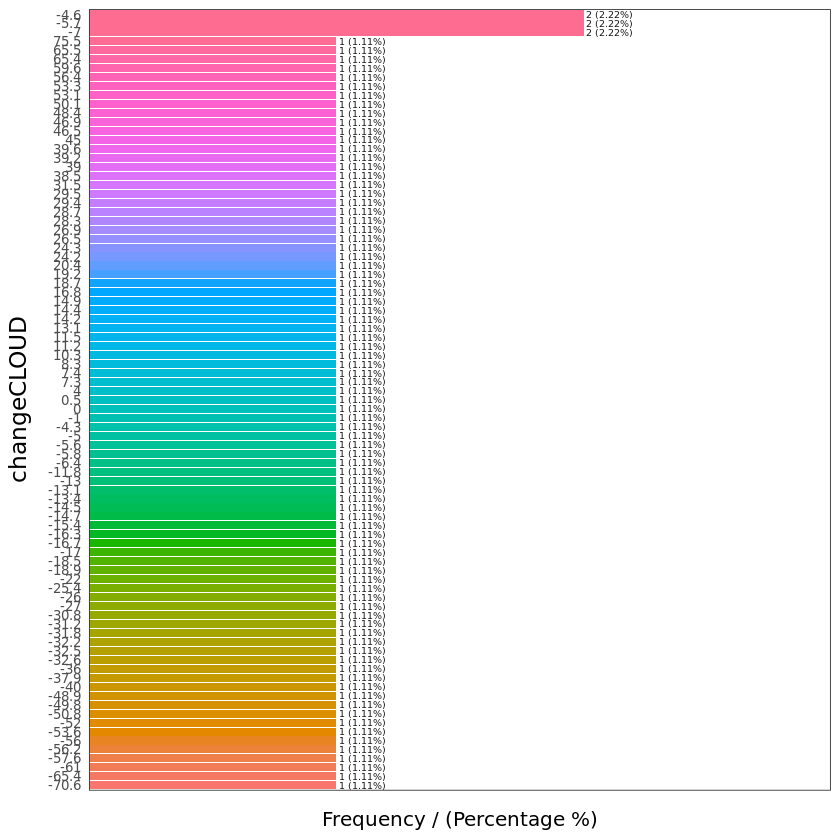

   changePRESSURE frequency percentage cumulative_perc
1            -6.4         2       2.22            2.22
2            -0.4         2       2.22            4.44
3             1.2         2       2.22            6.66
4             2.1         2       2.22            8.88
5             3.9         2       2.22           11.10
6             7.3         2       2.22           13.32
7             8.1         2       2.22           15.54
8           -25.3         1       1.11           16.65
9           -23.7         1       1.11           17.76
10          -22.6         1       1.11           18.87
11          -17.1         1       1.11           19.98
12            -17         1       1.11           21.09
13          -12.7         1       1.11           22.20
14          -12.1         1       1.11           23.31
15          -11.1         1       1.11           24.42
16          -10.3         1       1.11           25.53
17           -9.7         1       1.11           26.64
18        

[1] "Variables processed: changeAVG_TEMP, changeAVG_WIND, changeAVG_HUMID, changeCLOUD, changePRESSURE"

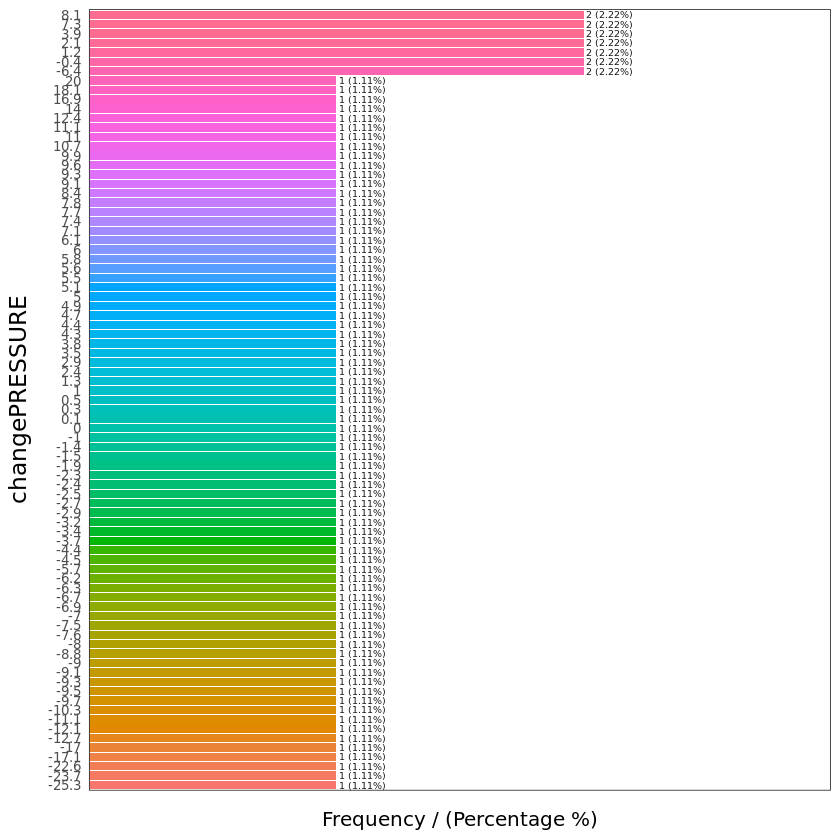

In [70]:
freq(data=data02, input = c('changeAVG_TEMP','changeAVG_WIND', 'changeAVG_HUMID', 'changeCLOUD','changePRESSURE'))

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


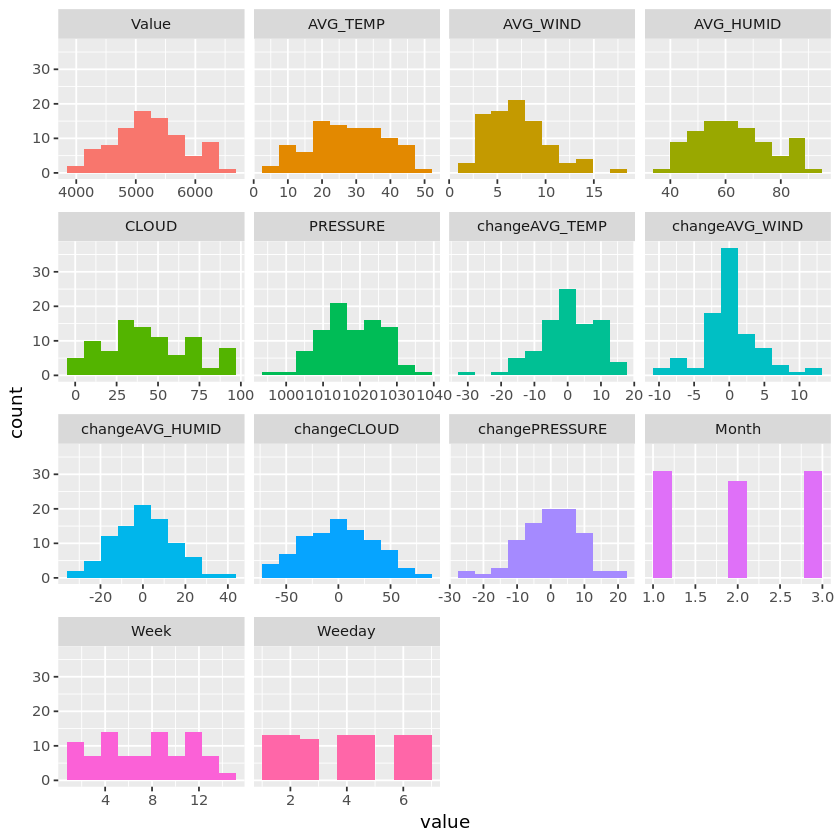

In [71]:
# Analyzing numerical variables
plot_num(data02) # Graphically

In [73]:
data02_prof=profiling_num(data02) # Quantitatively
data02_prof

variable,mean,std_dev,variation_coef,p_01,p_05,p_25,p_50,p_75,p_95,p_99,skewness,kurtosis,iqr,range_98,range_80
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Value,5226.3614,591.229,1.13e-01,4063.802,4291.4,4763.48,5233.94,5596.51,6226.32,6357.5,0.10277,2.40,833.04,"[4063.80191805, 6357.547358]","[4427.147718, 6162.0881835]"
AVG_TEMP,27.6278,10.543,3.82e-01,5.681,11.1,19.77,27.35,35.50,44.34,46.7,-0.10365,2.23,15.73,"[5.681, 46.721]","[12.26, 41.85]"
AVG_WIND,7.0400,3.218,4.57e-01,2.378,2.8,4.53,6.60,8.80,13.28,15.2,0.82558,3.61,4.28,"[2.378, 15.241]","[3.3, 11.3]"
AVG_HUMID,63.1678,13.605,2.15e-01,41.047,44.4,52.73,62.35,72.38,87.90,89.3,0.35373,2.24,19.65,"[41.047, 89.305]","[45.89, 84.61]"
CLOUD,44.0400,25.495,5.79e-01,0.645,5.5,26.38,39.55,61.12,89.25,91.4,0.22694,2.12,34.75,"[0.645, 91.399]","[11.72, 81.11]"
PRESSURE,1017.5967,8.313,8.17e-03,998.939,1003.9,1012.32,1017.15,1023.65,1029.60,1033.9,-0.15038,2.64,11.33,"[998.939, 1033.92]","[1007.21, 1027.7]"
changeAVG_TEMP,0.2000,8.395,4.20e+01,-22.545,-14.3,-4.50,0.25,6.42,11.86,14.8,-0.75389,4.14,10.92,"[-22.545, 14.8]","[-9.79, 10.25]"
changeAVG_WIND,0.1122,3.985,3.55e+01,-9.710,-6.7,-2.20,0.10,2.38,7.07,10.9,0.21512,3.96,4.58,"[-9.71, 10.922]","[-3.74, 4.72]"
changeAVG_HUMID,-0.0833,14.258,-1.71e+02,-31.418,-23.0,-9.55,-0.20,8.73,22.92,33.0,0.04978,2.89,18.27,"[-31.418, 32.995]","[-18.8, 18.33]"


In [78]:
data02_prof %>% select(variable, variation_coef, range_98)

ERROR: Error in select(., variable, variation_coef, range_98): unused arguments (variable, variation_coef, range_98)


In [79]:
library(Hmisc)

In [80]:
# Analyzing numerical and categorical at the same time
describe(data02)

data02 

 15  Variables      90  Observations
--------------------------------------------------------------------------------
Date 
       n  missing distinct 
      90        0       90 

lowest : 1-Feb-14  1-Jan-14  1-Mar-14  10-Feb-14 10-Jan-14
highest: 8-Jan-14  8-Mar-14  9-Feb-14  9-Jan-14  9-Mar-14 
--------------------------------------------------------------------------------
Value 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
      90        0       90        1     5226      678     4291     4427 
     .25      .50      .75      .90      .95 
    4763     5234     5597     6162     6226 

lowest : 4056 4065 4168 4199 4231, highest: 6230 6245 6309 6326 6616
--------------------------------------------------------------------------------
AVG_TEMP 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
      90        0       85        1    27.63    12.16    11.12    12.26 
     .25      .50      .75      .90      .95 
   19.77    2

In [82]:
# Fit a GLM regressor - which variables are appropriate for this model?
model_data02 <- lm(AVG_TEMP~changeAVG_TEMP + changeAVG_WIND + changeAVG_HUMID + changeCLOUD + changePRESSURE,data=data02)
summary(model_data02)
model_data02


Call:
lm(formula = AVG_TEMP ~ changeAVG_TEMP + changeAVG_WIND + changeAVG_HUMID + 
    changeCLOUD + changePRESSURE, data = data02)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.836  -6.919  -0.623   7.587  16.670 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      27.4672     1.0039   27.36   <2e-16 ***
changeAVG_TEMP    0.4292     0.1671    2.57    0.012 *  
changeAVG_WIND    0.3843     0.3381    1.14    0.259    
changeAVG_HUMID   0.0101     0.1208    0.08    0.933    
changeCLOUD      -0.0239     0.0482   -0.50    0.622    
changePRESSURE   -0.2297     0.2043   -1.12    0.264    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.51 on 84 degrees of freedom
Multiple R-squared:  0.231,	Adjusted R-squared:  0.186 
F-statistic: 5.06 on 5 and 84 DF,  p-value: 0.000424



Call:
lm(formula = AVG_TEMP ~ changeAVG_TEMP + changeAVG_WIND + changeAVG_HUMID + 
    changeCLOUD + changePRESSURE, data = data02)

Coefficients:
    (Intercept)   changeAVG_TEMP   changeAVG_WIND  changeAVG_HUMID  
        27.4672           0.4292           0.3843           0.0101  
    changeCLOUD   changePRESSURE  
        -0.0239          -0.2297  


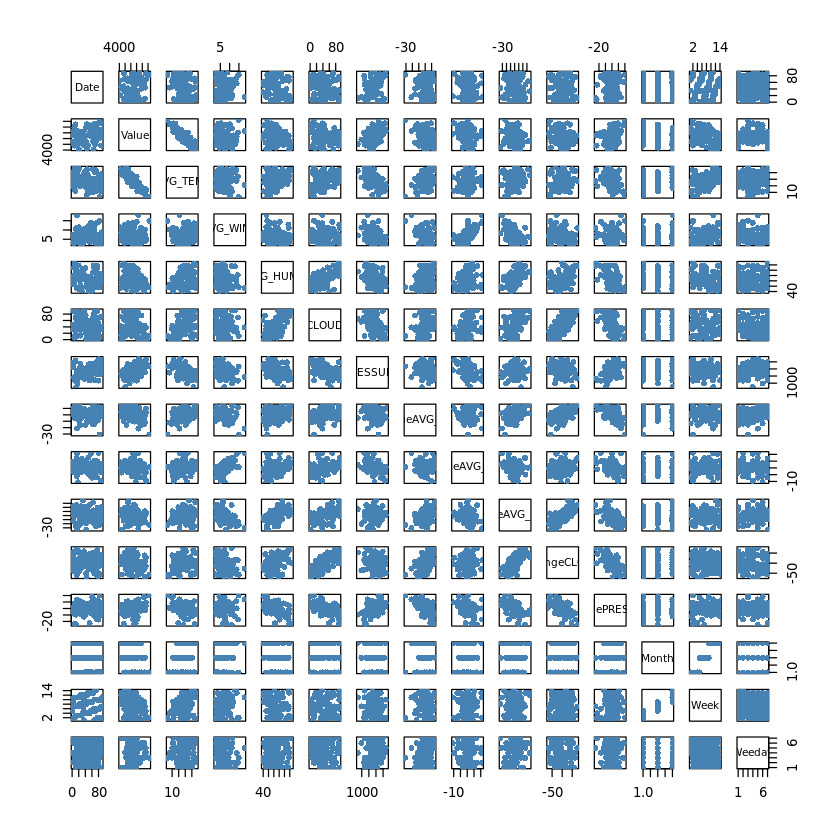

In [88]:
plot(data02, pch = 16, col = "steelblue")
abline(data02)

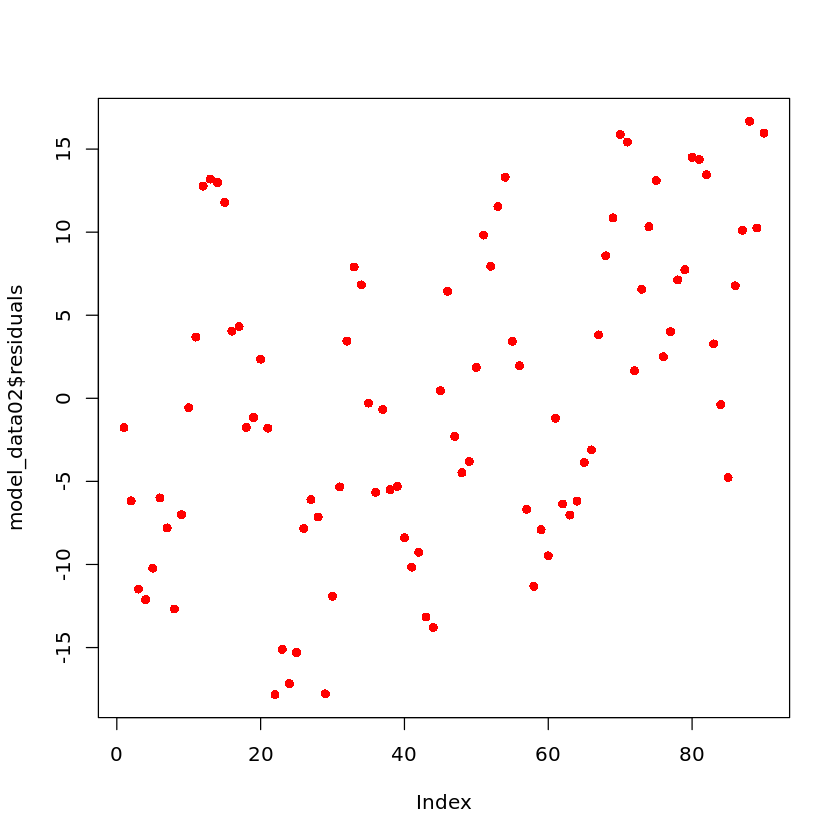

In [86]:
#Discuss if a linear regressor is appropriate for this problem?
plot(model_data02$residuals, pch = 16, col = "red")
